In [3]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

#print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


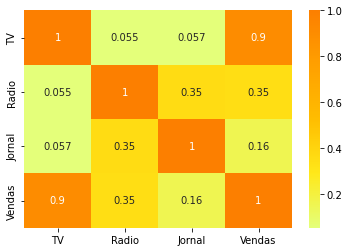

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria o gráfico
sns.heatmap(tabela.corr(), cmap= "Wistia", annot=True) # heatmap da correlação dos elementos da tabela, 
# cmap é a escala de cor do, annot coloca os valores nos pontos do grafico


#exibe o grafico
plt.show()

In [8]:
y= tabela["Vendas"]
x= tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state=1) #random_state cria uma seed pra gerar sempre os mesmos valores

In [10]:
from sklearn.linear_model import LinearRegression # Importar Modelo de Regressão Linear
from sklearn.ensemble import RandomForestRegressor # Random Forest

# Criar e treinar IA de Regressão Linear
modelo_regressaolinear = LinearRegression()
modelo_regressaolinear.fit(x_treino, y_treino)

# Criar e treinar IA de RandomForest (Árvore de Decisão)
modelo_arvoredecisao = RandomForestRegressor()
modelo_arvoredecisao.fit(x_treino, y_treino)




RandomForestRegressor()

In [11]:
# Realizar o teste do treino das IAs e verificar o percentual de acerto

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsoa_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsoa_arvoredecisao))

0.9071151423684273
0.9630795531274936


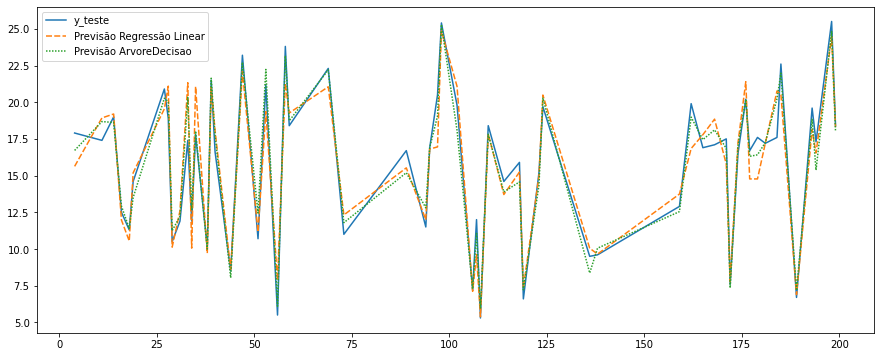

In [12]:
# Arvore de decisão é o melhor modelo, vamos usar ele para fazer as nossas previsões

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsão ArvoreDecisao"] = previsoa_arvoredecisao

plt.figure(figsize=(15, 6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [14]:
# Realizar nova previsão

nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)

# usar o modelo de arvore de decisão que já foi treinado
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.527  8.799 20.307]
